<a href="https://colab.research.google.com/github/PierrickLeroy/Activity_Detection_From_Electrical_Consumption_Load_Curves/blob/main/STS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>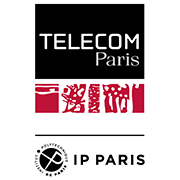</center>

<h1><center><strong>Semantic Textual Similarity (STS) project</strong></center></h1>

<center>
<h3> Project Supervisor: Aina Garí Soler</a></h3>
<email>aina.garisoler@telecom-paris.fr</email>  <br/>
Year 2021-2022
</center>

Test3 pierrick



## What is Semantic Textual Similarity (STS)?

Semantic Textual Similarity (STS) measures the degree of semantic equivalence between two texts. As an NLP task, it typically consists in determining, for two sentences $s_1$ and $s_2$, how similar they are in meaning. Systems must output a continous score $p$ between, for example, 0 (completely unrelated) and 1 (meaning-equivalent). For example, for these two unrelated sentences, $p$ should be close to 0:

$s_1$: *The black dog is running through the snow.*

$s_2$: *A race car driver is driving his car through the mud.*

### Why is it important?

There are several NLP applications that can directly benefit from STS predictions. Here are some examples:
- Evaluation of **Automatic Summarization** and **Machine Translation** models. These models must output sentences in natural language preserving the meaning of a reference text (the text to be summarized / translated);
- **Information Retrieval**: for checking the semantic equivalence between a query and a potential match;
- **Plagiarism detection**: for locating passages that are similar in content and potentially contain plagiarism.

### Why is it hard? 

**TL;DR**: Because there are different ways of saying the same thing, and there are subtle ways of saying radically different things.

Solving this task involves multiple kinds of non-trivial linguistic knowledge.Relying on counting the common words between $s_1$ and $s_2$ works to some extent, but it is not enough. The example below (taken from [Landauer et al., 1997](http://cetus.stat.cmu.edu/~cshalizi/350/2008/readings/Landauer-Dumais.pdf)), with a very high word overlap, illustrates this. The relations between words in a sentence are also important.

$s_1$: *It was not the sales manager who hit the bottle that day, but the office worker with the serious drinking problem.*

$s_2$: *That day the office manager, who was drinking, hit the problem sales worker with a bottle, but it was not serious.*


<p align="left">
  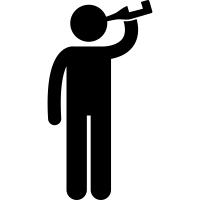


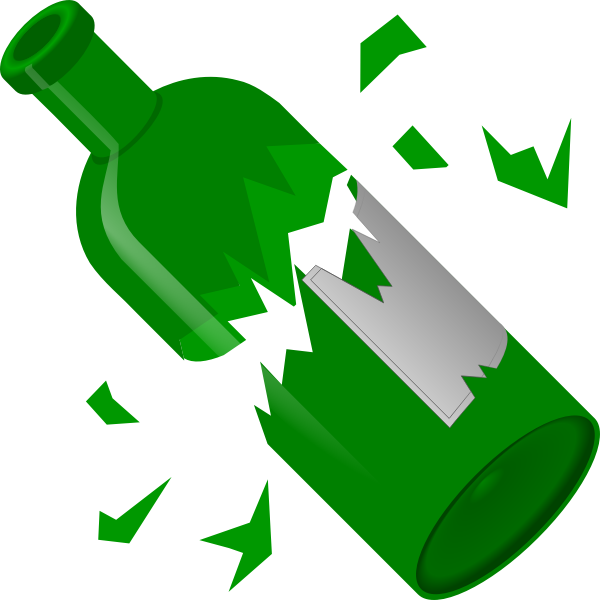



</p>

In fact, people may often refer to the same thing using different words (**synonyms**, like *happy* and *glad*, or **hypernyms**, like *animal* for *dog*). 

$s_1$: *I'm happy I managed to fix my dad's bike*

$s_2$: *I'm glad I could repair my father's bicycle*

  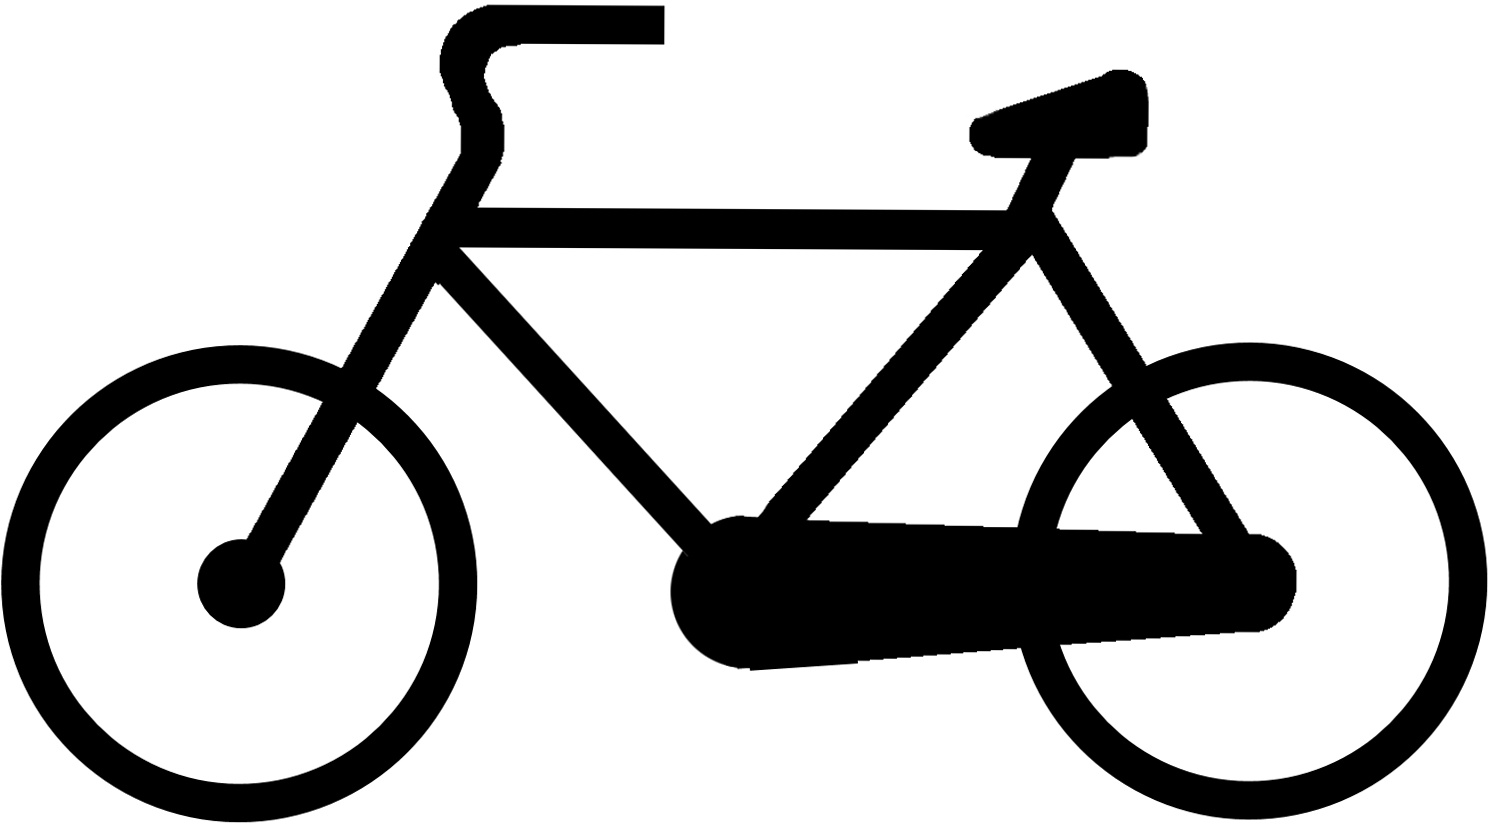

The simple addition of one word can change a situation completely:

$s_1$: *I enjoyed watching the stars* (⭐)

$s_2$: *I enjoyed watching the **TV** stars* (👩‍🎤)

## SemEval Workshop: Semantic Evaluation Challenges

[SemEval](https://semeval.github.io/) is a series of international workshops that proposes, every year, a number of NLP challenges. These challenges (or "shared tasks") target different tasks, all related to semantics. Teams participate by submitting their models, and optionally may write a paper describing their approach. The organizers of each task publish a paper describing the data used, and summarize the participating approaches and their results.

There have been multiple editions of STS tasks, each with a different dataset:
- [SemEval-2012 Task 6: A Pilot on Semantic Textual Similarity](https://aclanthology.org/S12-1051.pdf)
- [*SEM 2013 shared task: Semantic Textual Similarity](https://aclanthology.org/S13-1004.pdf)
- [SemEval-2014 Task 10: Multilingual Semantic Textual Similarity](https://aclanthology.org/S14-2010.pdf)
-[SemEval-2015 Task 2: Semantic Textual Similarity,
English, Spanish and Pilot on Interpretability](https://aclanthology.org/S15-2045.pdf)
- [SemEval-2015 Task 1: Paraphrase and Semantic Similarity in Twitter (PIT)](https://aclanthology.org/S15-2001.pdf)
- [SemEval-2016 Task 1: Semantic Textual Similarity,
Monolingual and Cross-Lingual Evaluation](https://aclanthology.org/S16-1081.pdf)
- [SemEval-2017 Task 1: Semantic Textual Similarity
Multilingual and Cross-lingual Focused Evaluation](https://aclanthology.org/S17-2001.pdf) 


For a summary of most of these tasks, including the datasets, you can visit [**this wiki**](http://ixa2.si.ehu.eus/stswiki/index.php/Main_Page).

For this project, you will work on solving this task using some of the datasets proposed in these SemEval challenges. You will use different kinds of features, and may find inspiration for your models in the papers above.


# Overview of the project

Both teams will implement at least 3 kinds of models to solve the standard English STS task:
### Common part: 
1. A traditional ML model relying on simple linguistic and textual features;
2. A traditional ML model relying on word representations;
3. A neural model (Siamese Bidirectional Long Short-Term Memory Network, BiLSTM) that computes sentence representations.

### Team-specific part:
One of the models above will be adapted for:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4a. A multilingual STS task \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4b. A cross-lingual STS task 


For (1), you will be asked to use some specific features and will be given hints on other (kinds of) features that you may want to try. You are also expected to check the bibliography to come up with potentially useful features.
For models of type (2) and (3), you will mostly be asked to complete portions of code. You are not expected to obtain outstanding results. The goal is rather for you to learn how to solve an NLP task using different approaches and to reflect on pre-processing as well as on the results obtained (do worry, though, if your correlations are all close to 0!)

**Places where you need to write code are marked with "## TO COMPLETE"**

# Let's start! Common part

In [ ]:
import os
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine, euclidean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.




## STSBenchmark Dataset

For models 1, 2 and 3 we will use the STSBenchmark, which contains portions of the datasets used in different STS tasks between 2012 and 2017. You can download it using [this link](http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz). The dataset comes with a pre-defined train/dev/test split.

You can find more details about this benchmark on [this wiki](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark).

Download the dataset, get acquainted with its format, upload it to Colab and load it using the function below.



In [ ]:
! tar -xvzf Stsbenchmark.tar.gz

tar (child): Stsbenchmark.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data():
  data = dict()
  for fn in os.listdir("/content/drive/MyDrive/Colab Notebooks/stsbenchmark"):
    print(fn)
    if fn.endswith(".csv"):
      with open("/content/drive/MyDrive/Colab Notebooks/stsbenchmark/"+fn) as f:
        subset = fn[:-4].split("-")[1]
        #print(subset)
        data[subset] = dict()
        data[subset]['data'] = []
        data[subset]['scores'] = []
        for l in f:
          #genre filename year score sentence1 sentence2 (and sources, sometimes)          
          l = l.strip().split("\t")          
          data[subset]['data'].append((l[5],l[6]))
          data[subset]['scores'].append(float(l[4])) 
  return data

dataset = load_data()

### Having a look at the data...

print("Some examples from the dataset:")
for i in range(5):
  print("s1:", dataset['train']['data'][i][0])
  print("s2:", dataset['train']['data'][i][1])
  print("score:", dataset['train']['scores'][i], "\n")

print("\nNumber of sentence pairs by subset:")
for subset in dataset:
  print(subset, len(dataset[subset]['data']))

print("\nRange of scores in the training set:", min(dataset["train"]["scores"]), "-", max(dataset["train"]["scores"]))


correlation.pl
sts-dev.csv
sts-test.csv
sts-train.csv
readme.txt
LICENSE.txt
Some examples from the dataset:
s1: A plane is taking off.
s2: An air plane is taking off.
score: 5.0 

s1: A man is playing a large flute.
s2: A man is playing a flute.
score: 3.8 

s1: A man is spreading shreded cheese on a pizza.
s2: A man is spreading shredded cheese on an uncooked pizza.
score: 3.8 

s1: Three men are playing chess.
s2: Two men are playing chess.
score: 2.6 

s1: A man is playing the cello.
s2: A man seated is playing the cello.
score: 4.25 


Number of sentence pairs by subset:
dev 1500
test 1379
train 5749

Range of scores in the training set: 0.0 - 5.0


In [ ]:
dataset['train']['data'][:10]

[('A plane is taking off.', 'An air plane is taking off.'),
 ('A man is playing a large flute.', 'A man is playing a flute.'),
 ('A man is spreading shreded cheese on a pizza.',
  'A man is spreading shredded cheese on an uncooked pizza.'),
 ('Three men are playing chess.', 'Two men are playing chess.'),
 ('A man is playing the cello.', 'A man seated is playing the cello.'),
 ('Some men are fighting.', 'Two men are fighting.'),
 ('A man is smoking.', 'A man is skating.'),
 ('The man is playing the piano.', 'The man is playing the guitar.'),
 ('A man is playing on a guitar and singing.',
  'A woman is playing an acoustic guitar and singing.'),
 ('A person is throwing a cat on to the ceiling.',
  'A person throws a cat on the ceiling.')]

## Word count baseline

The very first model you will use is fully implemented. It is a very simple baseline that you can compare to the other models you build. It consists of a Linear Regression model which uses a single feature based on word overlap.


In [ ]:
### word overlap baseline
def baseline_features(data):
  x = []
  for s1, s2 in data:
    cv = CountVectorizer(binary=True) # binary=True because we use Jaccard score (we want presence/absence information, not counts)
    vectors = cv.fit_transform([s1,s2]).toarray()    
    x.append(jaccard_score(vectors[0], vectors[1]))
  return np.array(x).reshape(-1,1)


## Evaluation

We evaluate the model directly on the test set since we will want to compare its performance to that of the other models. As an evaluation metric, following common practice in this task, we will use Pearson's correlation.

You can reuse some of the code below for your next models (and you should use the same evaluation function).


In [ ]:
## evaluation function: it returns Pearson's r
def evaluate(predictions, gold_standard):
  return pearsonr(predictions, gold_standard)[0] 


In [ ]:
# Mapping the scores from the [0,5] to the [0,1] range for convenience
train_y = np.array(dataset['train']['scores']) / 5
dev_y = np.array(dataset['dev']['scores']) / 5
test_y = np.array(dataset['test']['scores']) / 5

In [ ]:
train_baseline_x = baseline_features(dataset['train']['data'])
test_baseline_x = baseline_features(dataset['test']['data'])

# Having a look at the features and y
print(train_baseline_x[:10])
print(train_y[:10])
print("Checking the correlation of the word overlap feature with the gold standard scores on the training set:", pearsonr(train_baseline_x.squeeze(), train_y))

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_baseline_x, train_y)
# Predicting
predictions = linreg.predict(test_baseline_x)
# Evaluating
print("Pearson's r obtained on the test set:", evaluate(predictions, test_y))


[[0.66666667]
 [0.8       ]
 [0.6       ]
 [0.66666667]
 [0.83333333]
 [0.6       ]
 [0.5       ]
 [0.66666667]
 [0.5       ]
 [0.55555556]]
[1.   0.76 0.76 0.52 0.85 0.85 0.1  0.32 0.44 1.  ]
Checking the correlation of the word overlap feature with the gold standard scores on the training set: (0.6116184058994178, 0.0)
Pearson's r obtained on the test set: 0.5997660486084755


## Your turn 



## 1. A model using simple linguistic and textual features

Now it's your turn to develop a simple model for the STS task. The model should rely on simple features but without using distributional or distributed representations (for which we will have a dedicated model in (2)). You should:
* 1.1 **Preprocess** the sentences as you deem appropriate:\
[Tokenize](https://www.nltk.org/api/nltk.tokenize.html), lower-case, [remove stopwords](https://scikit-learn.org/stable/modules/feature_extraction.html#using-stop-words)\*... you could also try with [stemming](https://www.nltk.org/howto/stem.html) or [lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/), [pos-tagging](https://www.nltk.org/book/ch05.html) or [removing punctuation](https://www.geeksforgeeks.org/string-punctuation-in-python/), for example.
* 1.2 Come up with different kinds of **features**. \
This is the most important part. See below for more details.
* 1.3 Choose **at least a couple of different models** from sklearn (for example, LinearRegression or RandomForestRegression)
* 1.4 **Train** different feature and model combinations on the training set.
* 1.5 **Evaluate** them all on the **development set**.
* 1.6 **Evaluate** the best conifiguration (i.e. the one which obtained the best result on the development set) on the **test set**.

\* Not all stopwords lists are the same and you might want to adapt yours depending on the application. However, for the sake of simplicity, you can just use the stopwords list provided in NLTK [like shown here](https://awhan.wordpress.com/2016/06/05/scikit-learn-nlp-list-english-stopwords/).

### About the features
**You should implement at least 6 different features**, of which **there must be, at least**:
- One **WordNet**-based feature (for example, does $s_2$ contain synonyms or hypernyms of words in $s_1$? how many of them?) You can use [nltk's wordnet interface](https://www.nltk.org/howto/wordnet.html).
- One **TF-IDF** based feature. You can fit a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer) on the whole training set, treating a sentence as a document. Then you can calculate the similarity (cosine, euclidean...) between the representations of $s_1$ and $s_2$.
- One more complex **overlap** feature (based on n-gram overlap, $n>1$). You can use the *ngram_range* parameter of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Your model can, *additionally*, include the word overlap feature used by the baseline model, leaving it as is or modifying it (for example trying cosine similarity).

More ideas: consider exploiting [the PPDB resource](https://aclanthology.org/S12-1060.pdf), using the overlap of [syntactic roles](https://spacy.io/usage/linguistic-features) or pos-tags, [word alignment](https://aclanthology.org/Q14-1018.pdf) features (for example with [this tool](https://github.com/ma-sultan/monolingual-word-aligner), or something simpler), a Machine Translation evaluation metric (like [BLUE](https://machinelearningmastery.com/calculate-bleu-score-for-text-python/)), the edit distance...

IMPORTANT: You should check the SemEval reports listed at the beginning (for example [this one](https://aclanthology.org/S12-1060.pdf)) or model descriptions (like [this one](https://aclanthology.org/S17-2028.pdf)) to see what features other models have relied on in the past and/or how they were implemented. 

NOTE: Empty functions are just there for your orientation, feel free to organize the code as it suits you, adding as many functions as needed.


In [ ]:
#### Preprocess all the data

def preprocess_dataset(dataset):
  ## TO COMPLETE
  return preprocessed_dataset

#### Extract features
def extract_features(preprocessed_dataset):
  '''Similarly to baseline_features, this function could return an array with all features, or a DataFrame'''
  ## TO COMPLETE
  return features

In [ ]:
##### Build and train different models. You can do a little feature ablation (i.e. removing one feature at a time)
##### to see the usefulness of the different features.

## TO COMPLETE

##### Evaluate the models on the dev set. You can use the evaluate() function above.

## TO COMPLETE

In [ ]:
#### Evaluate the best model on the test set. 

## TO COMPLETE

#### A bit of reflection

In the report, you can write:
- Why did you preprocess the data in this way? If you tried multiple preprocessing variants, which one worked best and why do you think that is the case?
- Why did you choose these features? Did you find them somewhere?
- What were the most useful features in the end? Why do you think this is the case?

## 2. A model relying on distributional and distributed word representations

The second model that you'll build will rely on a different kind of features, obtained from word vector representations. You have to:
- 2.1 **Preprocess** the text. Be careful, you might want to follow a different strategy this time (would stemming be a good idea?)
- 2.2 **Build/download word representations** (more on this below)
- 2.3 **Aggregate** the representations of words in a sentence (for example, by taking their average, or the sum) to obtain a sentence representation. 
- 2.4 Try **two kinds of features** in a simple ML model: \
&nbsp;&nbsp;&nbsp;&nbsp;- (a) the concatenation of the sentence representations themselves;\
&nbsp;&nbsp;&nbsp;&nbsp;- (b) different similarity/distance measures (cosine, euclidean...)
- 2.5 As done before, **train** the models on the training set, **evaluate** them on the development set, and finally **evaluate** the best model on the test set.

### About the word representations
You **must use two kinds** of word representations: distributional and distributed.
All word representations that we will use are obtained based on the distributional hypothesis (Harris, 1954): the idea that semantically similar words tend to occur in the same (or similar) contexts. Or, as Firth (1959) put it, "*you shall know a word by the company it keeps*".

#### **Distributional representations**


We will build distributional representations for words by collecting co-occurrence counts from the sentences. First, we need to create a **vocabulary** $V$, which is basically a list of words seen in the training set for which we want to build a vector representation.
Let $|V|$ be the size of our vocabulary. We will create a matrix $M$ of size $|V| \times |V|$. $M_{ij}$ will contain the number of times word $i$ *co-occurred* with word $j$. The definition of *co-occurrence* is flexible. In this exercise we will define it as *appearing in the same sentence*. 
Most of the code to obtain them is already there.

Once we have obtained the co-occurrence counts, we can still modify the matrix in order to make the most of them. One way of doing so is calculating the Pointwise Mutual Information (PMI), which quantifies the interdependence between two variables (= two words), or how expected the co-occurrence of two words is.

$$
\text{PMI}(x,y) = \log \left( \frac{P(x,y)}{P(x)P(y)} \right)
$$

$P(x,y)$ is the number of times words $x$ and $y$ have co-occurred. $P(x)$ is the probability of word $x$ (= all co-occurrences where $x$ appears).

#### **Distributed representations**
We will use out-of-the-box word embeddings. These are dense word representations that have been trained on large amounts of text using a neural model with a language-model-like objective. Concretely, for this exercise we will use pre-trained [word2vec](https://towardsdatascience.com/word2vec-explained-49c52b4ccb71) word embeddings.
<br/><br/>

An important part of the code is provided so you'll mainly have to take care of aggregating the word embeddings of the words in a sentence.
There are different libraries to use word embeddings. For this experiment we will be using [magnitude](https://github.com/plasticityai/magnitude) because of its high speed and because its ability of inducing vectors for unknown words.
You can download the word embeddings we'll use [here](http://magnitude.plasticity.ai/word2vec/medium/GoogleNews-vectors-negative300.magnitude). Uploading them to Google Drive will make uploading them to Colab faster.

### Distributional representations: experiments

In [ ]:
#### Building distributional representations
sws = stopwords.words('english')
sws = set(list(sws) + [p for p in punctuation])

def put_sentences_together(dataset):
  all_sentences = []  
  for s1, s2 in dataset["train"]["data"]:
    all_sentences.extend([s1, s2])
  return all_sentences


def create_vocabulary(dataset, count_threshold=1, voc_threshold=None, stopwords=set(), lowercase=False):
    """    
    Function using word counts to build a vocabulary 
    Params:
        corpus (list of list of strings): corpus of sentences
        count_threshold (int): minimum number of occurences necessary for a word to be included in the vocabulary
        voc_threshold (int): maximum size of the vocabulary 
        stopwords: a set of words which are excluded from the vocabulary
        lowercase: bool. If True, all words are lowercased (which results in a smaller, more compact vocabulary)
    IMPORTANT: the vocabulary includes "UNK", which is a placeholder for an unknown word and it will later be assigned a zero vector.
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency        
    """    
    corpus = put_sentences_together(dataset)
    word_counts = {}
    for sent in corpus:
        for word in word_tokenize(sent):
            if lowercase:
              word = word.lower()          
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1   
    # Create a dictionary called <filtered_word_counts> (with words as keys and their frequencies as values).
    # Include only those words that appear more than <count_threshold> times,
    # and which are not in the set of stopwords.
    ## TO COMPLETE 
    
    
    # Create a list called <words> sorting the words from highest to lowest frequency
    ## TO COMPLETE
    

    if voc_threshold is not None:
        words = words[:voc_threshold] + ['UNK']   
    vocabulary = {words[i] : i for i in range(len(words))}
    return vocabulary, {word: filtered_word_counts.get(word, 0) for word in vocabulary}

def co_occurence_matrix(dataset, vocab):
    """
    Params:
        dataset: output of load_data()
        vocab: first output of create_vocabulary(). These are the words that will be included in the matrix        
    Returns:
        matrix (array of size (len(vocab), len(vocab))): the co-occurrence matrix, using the same ordering as the vocabulary given in input
    """ 
    l = len(vocab)
    all_sentences = put_sentences_together(dataset)
    M = np.zeros((l,l))
    for sent in all_sentences:
        sent = word_tokenize(sent)
        sent_idcs = [vocab.get(word, len(vocab)-1) for word in sent]
        for i, idx in enumerate(sent_idcs):            
            for j, ctx_idx in enumerate(sent_idcs[i+1:]):
              M[idx][ctx_idx] +=1
              M[ctx_idx][idx] +=1
    return M  



In [ ]:
# Build vocabulary
## TO COMPLETE


# Build co-occurrence matrix
M = co_occurence_matrix(dataset, vocab)

In [ ]:
# A function that converts the matrix values to PMI
def pmi(M, positive=True):
    sum_vec = M.sum(axis=0)
    sum_tot = sum_vec.sum()
    with np.errstate(divide='ignore'):
        pmi = np.log((M * sum_tot) / (np.outer(sum_vec, sum_vec)))                   
    pmi[np.isinf(pmi)] = 0.0  # log(0) = 0
    if positive:
        pmi[pmi < 0] = 0.0
    return pmi


# To apply the transformation:
#PMI_M = pmi(M)


Here's the part where you get to combine the vectors of the words making up a sentence into a sentence representation. You can complete and modify the function `assign_distributional_vectors` to your convenience, trying different things:
- Choose **what words to include** and which not to include. You can use a postag filter* to, for example, include only words that are richer in content (nouns, verbs and adjectives)
- Choose **an operation** to combine the word representations. In doing that, take into account that words that are not in the vocabulary should be assigned the id of the 'UNK' token, which corresponds to a zero vector. Alternatively you can leave out all unknown words.
- Try using the **concatenation** of the representations of $s_1$ and $s_2$ as features, and one or multiple **similarity/distance metrics** as **features**.

\* For postagging I recommend using the universal tagset for its simplicity. Below I included the code to load the postagger. Check out the tag list at 2.3 [here](https://www.nltk.org/book/ch05.html).



In [ ]:
# Loading the postagger
nltk.download('universal_tagset')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')



def assign_distributional_vectors(data, M, vocab, sim_or_dist=True, postag=False, lowercase=False):
  '''This functions assigns each sentence a vector and optionally calculates the similarity/distance 
  between the representations of s1 and s2.
  Parameters
    data: list of tuples (like dataset['train']['data'])
    M: a matrix of distributional representations for all words in the vocabulary
    vocab: first output of create_vocabulary(). These are the words that will be included in the matrix        
    sim_or_dist: bool. If True, we will use a similarity or distance as the only feature. If False,
    we will use the concatenation of the representations of s1 and s2.
    postag: whether we want to apply a postag-based filter to obtain sentence representations
    lowercase: bool. If True, words are lowercased. You should set it to True if the vocabulary is lowercased.
  Returns:
    features: an array with the data transformed into features '''
  if sim_or_dist:
    features = np.zeros((len(data), 1))
  else:
    features = np.zeros((len(data), M.shape[1]*2))  
  for i, (s1, s2) in enumerate(data):
    # Tokenize, lowercase if lowercase=True, and if postag=True, postag s1 and s2    
    ## TO COMPLETE        
   




    # Now create two lists, one for each sentence, with the word representations that you want to use
    # You can go through the words (or word, pos) in each sentence and decide whether you keep their representation or not
    ## TO COMPLETE




    # It is possible that some sentences will not have any word representation available.
    # We assign them a 0-vector in this case (be careful, because this could result in a cosine of NaN)
    if not s1vecs:
      s1vecs = [np.zeros(M.shape[1])]
    if not s2vecs:
      s2vecs = [np.zeros(M.shape[1])]    
    
    # Aggregate the representations of words in a sentence, for example by averaging them
    ## TO COMPLETE


    # Fill in features[i] with the desired feature (one or more similarity/distance measures if sim=True, 
    # a concatenation of the representations otherwise)
    ## TO COMPLETE
   
   
  return features



In [ ]:
# Obtain train_x, dev_x, test_x
# Try different combinations (using M, PMI_M, different aggregation functions, with and without postag filtering...)
## TO COMPLETE



In [ ]:
# Train and evaluate the models on the dev set
## TO COMPLETE


In [ ]:
# Evaluate the best model on the test set
## TO COMPLETE

### Distributed representations: word2vec experiments

In this experiment you don't have to create your own word representations, we will use pre-trained word embeddings which can be loaded with the code below.
What you will have to do is similar to what you did once you built the distributional representations: preprocess sentences and combine word embeddings to create sentence representations.
**Additionally**, you will experiment with **Word Mover's Distance**. This measure uses word vectors and looks for the shortest "traveling distance" between the vectors in the two sentences. You will find its implementation (slightly modified from that in the [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html) library) in `wmdistance`. you can use it as a/the feature in your model.

In [ ]:
# This may take a while...
! pip install pymagnitude

In [ ]:
### How pymagnitude works
from pymagnitude import *

# Loading vectors
## TO COMPLETE : specify the path to the magnitude file in ""
vectors = Magnitude("") 

# This is how you obtain the vector for a word (for example, "cat"):
cat_vector = vectors.query("cat")

In [ ]:
! pip install pyemd
! pip install gensim
from gensim.corpora.dictionary import Dictionary
import pyemd

## A function that calculates Word Mover's Distance, slightly modified from https://tedboy.github.io/nlps/_modules/gensim/models/word2vec.html#Word2Vec.wmdistance
   
def wmdistance(words1, words2, vectors):
    """
    words1 and words2 are lists of str containing the words of the first and second sentence in a sentence pair. 
    These should include only words that you are interested in (e.g., maybe you exclude stopwords or words of some pos)
    vectors is a Magnitude object (created above with the downloaded word embeddings)
    """
    # Remove out-of-vocabulary words.    
    if len(words1) == 0 or len(words2) == 0:
        print('At least one of the documents had no words that were'
                    'in the vocabulary. Aborting (returning inf).')
        return float('inf')
    
    dictionary = Dictionary(documents=[words1, words2])
    vocab_len = len(dictionary)

    # Sets for faster look-up.
    docset1 = set(words1)
    docset2 = set(words2)

    # Compute distance matrix.
    distance_matrix = np.zeros((vocab_len, vocab_len)) #, dtype=double)
    for i, t1 in dictionary.items():
        for j, t2 in dictionary.items():
            if not t1 in docset1 or not t2 in docset2:
                continue
            # Compute Euclidean distance between word vectors.
            distance_matrix[i, j] = np.sqrt(np.sum((vectors.query(t1) - vectors.query(t2))**2))

    if np.sum(distance_matrix) == 0.0:
        # `emd` gets stuck if the distance matrix contains only zeros.
        print('The distance matrix is all zeros. Aborting (returning inf).')
        return float('inf')

    def nbow(words):
        d = np.zeros(vocab_len) #, dtype=double)
        nbow = dictionary.doc2bow(words)  # Word frequencies.
        doc_len = len(words)
        for idx, freq in nbow:
            d[idx] = freq / float(doc_len)  # Normalized word frequencies.
        return d

    # Compute nBOW representation of documents.
    d1 = nbow(words1)
    d2 = nbow(words2)

    # Compute WMD.
    return emd(d1, d2, distance_matrix)

In [ ]:

def assign_distributed_vectors(data, vectors, sim_or_dist=True, postag=False, lowercase=False, wmdistance=False):
  # Write a function like assign_distributional_vectors which uses distributed
  # vectors. You can also simply modify that function.  
  '''This functions assigns each sentence a vector and optionally calculates the similarity/distance 
  between the representations of s1 and s2.
  Parameters
    data: list of tuples (like dataset['train']['data'])
    vectors: vectors in Magnitude format    
    sim_or_dist: bool. If True, we will use a similarity or distance as the only feature. If False,
    we will use the concatenation of the representations of s1 and s2.
    postag: whether we want to apply a postag-based filter to obtain sentence representations
    lowercase: bool. If True, words are lowercased.
    wmdistance: bool. If True, Word Mover's Distance is used.
  Returns:
    features: an array with the data transformed into features '''
  ## TO COMPLETE
 
   return features


In [ ]:
# Obtain train_x, dev_x, test_x
# Just as before, try different combinations (different aggregation functions, with and without postag filtering, with and without WMDistance...)
## TO COMPLETE


In [ ]:
# Train and evaluate the models on the dev set
## TO COMPLETE


In [ ]:
# Evaluate the best model on the test set
## TO COMPLETE

### A bit of reflection

In the report, you can write:
- What combinations did you try? Which ones worked best and why do you think that is the case?
- What kind of vectors were most effective? Do you have an idea why?

## 3. A Neural model that computes sentence representations

In this third part, you will train a neural model which learns representations of sentences and optimizes them so their cosine similarity reflects their semantic similarity.

The model is a Siamese bidirectional Long Short-Term Memory (biLSTM) network. In short, it is called *Siamese* because it works with two input vectors (each corresponding to one sentence) which need to be compared.
An *LSTM* is a type of recurrent neural network and so it is used when inputs consist of sequences. We choose a *bidirectional* model because it processes an input sentence in two directions, from left to right and from right to left, which helps in better preserving information from both ends of the sentence. 

You will find an almost-complete implementation in PyTorch. You are expected to complete some pieces of code and to experiment with different parameters, such as the hidden sizes or the number of layers and/or epochs.

Overall, the steps are:
- 3.1 Creation of a pytorch **Dataset** 
- 3.2 Defining and instantiating **model** 
- 3.3 Building the **training loop**
- 3.4 **Training** the model with **at least 5 different configurations**, **evaluating** on the dev set
- 3.5 **Evaluating** the best model on the test set.

But first, let's see a **brief introduction** to (recurrent) neural networks and PyTorch.

### On neural networks

An in-depth study of neural networks is not the object of this project, but it can be useful to have a rough idea of how they work. We will present them here briefly; the curious reader can consult the sources cited below, refer to the Deep Learning course of the curriculum or search by themselves, on the Internet for example.

The perceptron, also called artificial neuron or formal neuron, tries to reproduce the function of a biological neuron. The objective of a neural network is to reproduce an arbitrarily complex function that associates an input $x$ with an output $y$. For example, we can create neural networks to recognize a dog from a cat: the input is then an image, and the output the word "dog" or "cat".

A layer of a neural network is governed by the following equation:

$$ \hat{y} = f(\mathbf{W} \mathbf{X} + b) $$

where
- $\mathbf{X}$ is the input matrix, usually consisting of several vectors $x_1, \dots, x_m$
- $\hat{y}$ is the output vector
- $\mathbf{W}$ is a matrix of weights (parameters specific to the layer, which can be updated)
- $b$ is a vector of weights called *bias* (also subject to evolution)
- $f$ is a function called *activation function*, generally non-linear like the sigmoid, $\mathrm{ReLU}$ or $\tanh$ functions.

<img src="https://user.oc-static.com/upload/2018/12/10/15444553183515_neuroneformel-1.png" width="450">

The main thing to remember is that the layers of a neural network combine inputs $x_1, \dots, x_m$ by linear (the $\mathbf{W} \mathbf{X} + b$) and non-linear ($f$) operations in the hope of obtaining an output $y$.

In practice, at the initialization of the network, given an input $x$, we usually obtain an output $\hat{y}$ which can be very different from $y$ : the parameters $\mathbf{W}$ and $b$ are not yet appropriate.

We then perform a *training* of the neural network which allows to reduce the distance between $\hat{y}$ and $y$, i.e. to minimize the *loss function* $\mathcal{L}(y, \hat{y}) = \| \hat{y} - y \|^2$. This is usually done by an optimization process such as gradient descent. We will skip the technical details (look at the sources for more information); just remember that by updating the parameters $\mathbf{W}$ and $b$ incrementally, it is possible to improve the performance of the network as it will produce a $\hat{y}$ similar to the desired $y$.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG.png" width="500">

By stacking such layers, the network becomes more complex, hence, more elaborate mechanisms can be approximated. However, this usually requires a longer and more data-intensive training. The "*Deep*" in *Deep Learning* reflects the fact that we use multi-layered neural networks.

As an illustration, here is a neural network that learns to separate crosses and circles: the more the training progresses (a full pass through the dataset is commonly called *epoch*), the better it works.

<img src="https://user.oc-static.com/upload/2018/12/12/15446484526497_linearsep_anim.gif" width="500">

**Sources**
- [OpenClassrooms - Initiez-vous au Deep Learning](https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning)
- [IBM - What are neural networks?](https://www.ibm.com/cloud/learn/neural-networks)

### Recurrent Neural Networks
Recurrent neural networks (RNN) are neural networks that are particularly adapted to process sequential data such as time series or text. Indeed, in a text, there are sequential dependencies between words; we cannot write a sentence in any order, in French or English at least.

The difference between RNNs and classical neural networks (usually called *feed-forward neural networks*) is that the former have a "memory" represented by a hidden state that evolves along a "time" axis in any given layer.

<img src="https://miro.medium.com/max/875/1*AQ52bwW55GsJt6HTxPDuMA.gif" width="600">
<img src="https://miro.medium.com/max/875/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif" width="600">
<img src="https://miro.medium.com/max/875/1*WMnFSJHzOloFlJHU6fVN-g.gif" width="600">

There are many ways to implement such a memory; here we will use a type of RNN called LSTM (Long-Short Term Memory), which was the best performing model until the introduction of the *Transformer* in 2017 (the *Transformer* will not be on the agenda of this project; the curious reader may read the corresponding paper in the sources).

<img src="https://miro.medium.com/max/875/1*0f8r3Vd-i4ueYND1CUrhMA.png" width="600">

The LSTM exhibits several interesting mechanisms; in particular, it has the ability to choose what it wishes to retain or forget in the long term. Refer to the sources for more detail.


**Sources**

- [colah's blog - Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Towards data science - Illustrated Guide to LSTM’s and GRU’s: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)
- [Distill - Attention and Augmented Recurrent Neural Networks](https://distill.pub/2016/augmented-rnns/)
- [Transformer - Attention Is All You Need](https://arxiv.org/abs/1706.03762)

### Pytorch
PyTorch is a Python-based library for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients 


In [ ]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

#### Tensors

**NB**: Tensor are the basics block of pytorch. Tensor allows to store data (input data or target data) as well as the parameters (also called weights, neurons,...) of your neural network.

(image by [Matthew Mayo](https://www.kdnuggets.com/author/matt-mayo))

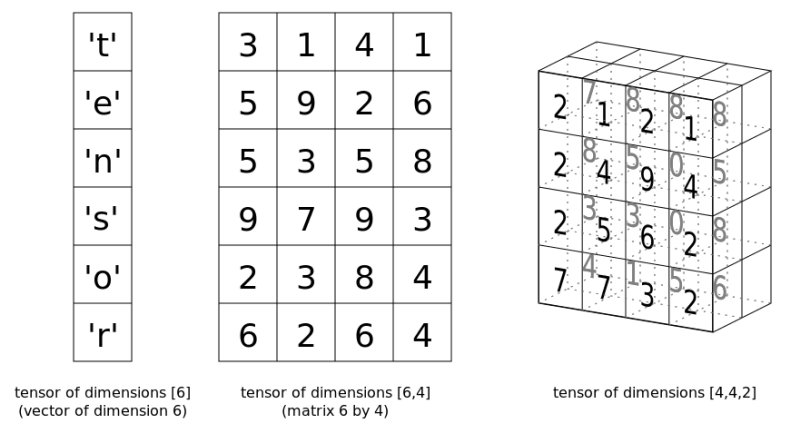

**What is a pytorch tensor?** : A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

**How to define a pytorch tensor?**
- using existing constructors : _torch.ones_ , _torch.zeros_ _torch.rand_
- based on existing object
    - from another tensor (or only using the shape of the other tensor)
    - from a python list 
    - from a numpy array

In [ ]:
# define 
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

In [ ]:
# other basic definition 
print(torch.zeros(5,3), "\n", 
      torch.rand(2,3), "\n", 
      torch.empty(2,2))

In [ ]:
# from a python list 
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array : 
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

If the list is not a proper matrix shape, an exception is returned!

In [ ]:
# list must be in a proper matrix shape
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4]]]
torch.Tensor(ls)

**Basic manipulations**
- access type / change data types 
- access elements 
- reshape 
- maths opertions : add, multiply , ..
- differentiate / derive
- set to a specific _device_ : GPU , GPU:0, GPU:1 , CPU ...

In [ ]:
# get type 
print(tensor,tensor.dtype)
# change type 
tensor = tensor.float()

**NB**: types are important in Deep Learning  because: 
- some types are more memory consumming than others : e.g : float16 vs float32
- some operations require a specific type (cf. Embedding layer ...)

In [ ]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

**NB**: pytorch tensor indexing exactly match numpy indexing

In [ ]:
# get the shape of a tensor
tensor.size()
# reshape it 
print(tensor, "\n",
      tensor.view(2,2,5))

In [ ]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

#### Operations on Tensors

❗**Beware of Broadcasting** ❗ issues if your tensors does not have the same size. As in [Numpy broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules), some operations above can broadcast, i.e. extend, their application to the size of the targeted tensor.

One really good explanation about PyTorch specific broadcasting can be found here: https://stackoverflow.com/questions/51371070/how-does-pytorch-broadcasting-work

Let's take the same example and reproduce it here.



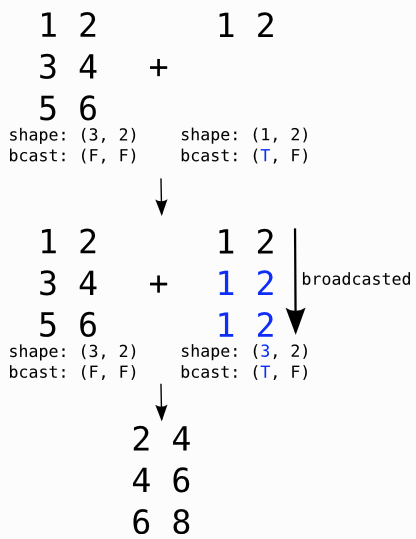

In PyTorch we reproduce it as follows:

In [ ]:
tensor_a = torch.Tensor([[1,2], [3,4], [5,6]])
tensor_b = torch.Tensor([1,2])
tensor_a + tensor_b

#### Automatic Differentiation

The core component of any modern deep learning library is _Automatic Differentiation_. 

**Recall**
- Training any deep learning model requires backpropagation 
- Backpropagation is an algorithm that efficiently computes the gradient of a neural network's output based on its input and with regard to all its parameters (or also named weights)

_Automatic Differentiation_ provides a way of automatically computing gradients of any function. 

### (3.1) Creating a Pytorch **Dataset**

The best way to prepare our dataset to be used in a pytorch model is by using the `torch.utils.data.Dataset` class. We will create a class inheriting from Dataset which should have the `__len__` and `__getitem__` methods. You can find a complete description and example [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

We will also use the [**DataLoader**](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders), which takes care of batches, shuffling the data...

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
from torch.nn import CosineSimilarity, MSELoss
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
list(zip(dataset['train']['data'], dataset['train']['scores']))[:3]

[(('A plane is taking off.', 'An air plane is taking off.'), 5.0),
 (('A man is playing a large flute.', 'A man is playing a flute.'), 3.8),
 (('A man is spreading shreded cheese on a pizza.',
   'A man is spreading shredded cheese on an uncooked pizza.'),
  3.8)]

In [ ]:
class STSDataset(Dataset):  
    def __init__(self, data, max_length=30, vocab=None, min_word_freq=2,lowercase=True):
        '''Params:
        data: dict with 'data' and 'scores' (as in dataset['train'] from load_data())
        vocab: (word2idx, idx2word). A tuple with two dicts: word -> index and index -> word. 
        If it is None, the vocabulary is created within the function.
        For the dev and test sets, you should use the training vocabulary.        
        max_length: maximum sequence length (in words) allowed. Longer sentences will be truncated. Shorter ones
        will be padded.
        min_freq: int. Used only if vocab=None, to create the vocabulary. 
        lowercase: bool. If True, words are lowercased.'''
        
        # Get the data
        self.data = data['data']
        # Set the maximum length we will keep for the sequences
        self.max_length = max_length
        # Allow to import a vocabulary (for valid/test datasets, that will use the training vocabulary)
        if vocab is not None:
            self.word2idx, self.idx2word = vocab
        else:
            # If no vocabulary imported, build it (and reverse)
            self.word2idx, self.idx2word = self.build_vocab(self.data, min_word_freq, lowercase=lowercase)        
                
        s1s = []
        s2s = []
        for s1, s2 in self.data:        
            s1_idcs = []
            s2_idcs = []
            # Tokenize each sentence and turn it into a list of vocabulary indices (remember to take care of UNK). Lowercase if necessary            
            ### TO COMPLETE
            ## Considérer les stopwords, la ponctuation..
            for w1 in word_tokenize(s1):
                if w1 in self.word2idx:
                    s1_idcs.append(self.word2idx[w1])
                else:
                    s1_idcs.append(self.word2idx['UNK'])
            for w2 in word_tokenize(s2):
                if w2 in self.word2idx:
                    s2_idcs.append(self.word2idx[w2])
                else:
                    s2_idcs.append(self.word2idx['UNK'])
            
            # Truncate sequences that are longer than <max_length>. Append them to s1s and s2s.
            ### TO COMPLETE
            for s_idcs in (s1_idcs, s2_idcs):
                if len(s_idcs)>30:
                  s_idcs = s_idcs[:30]             
            s1s.append(s1_idcs)
            s2s.append(s2_idcs)            
            
        # Apply padding: for sequences shorter than <max_length>, we fill them with 0 values 
        # This way they all have the same length (max_length) and we can create a pytorch tensor with them            
        self.tensor_s1 = torch.LongTensor(pad_sequences(s1s)) # padding 'pre' by default
        self.tensor_s2 = torch.LongTensor(pad_sequences(s2s))

        # Make a tensor with the targets - we map them to the [-1, 1] interval for convenience (same range as the cosine)
        self.tensor_y = (((torch.FloatTensor(data['scores']) + 1) / 6) * (1+1)) -1 
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # The iterator just gets one particular example with its category
        # The dataloader will take care of the shuffling and batching
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self.tensor_s1[idx], self.tensor_s2[idx], self.tensor_y[idx]
  
    def build_vocab(self, corpus, count_threshold, lowercase):        
        word_count = {}
        for s1, s2 in corpus:
            if lowercase:
              s1 = s1.lower()
              s2 = s2.lower()            
            s1_tokens = word_tokenize(s1)
            s2_tokens = word_tokenize(s2)
            for token in s1_tokens + s2_tokens: 
                if token not in word_count:
                    word_count[token] = 1
                else:
                    word_count[token] += 1
        filtered_word_counts = {word: count for word, count in word_count.items() if count >= count_threshold}
        words = sorted(filtered_word_counts.keys(), key=word_count.get, reverse=True) + ['UNK']
        # But we need to shift the indexes by 1 to put the padding symbol to 0
        word_index = {words[i]: i + 1 for i in range(len(words))}
        idx_word = {i + 1: words[i] for i in range(len(words))}
        return word_index, idx_word

    def get_vocab(self):
        # A simple way to get the training vocab when building the valid/test
        return self.word2idx, self.idx2word

In [ ]:
training_dataset = STSDataset(dataset['train'], max_length=30, vocab=None, min_word_freq=2,lowercase=True)
# create dev_dataset and test_dataset as above using the training vocabulary
test_dataset = STSDataset(dataset['test'], max_length=30, vocab=training_dataset.get_vocab(), min_word_freq=2,lowercase=True)
dev_dataset = STSDataset(dataset['dev'], max_length=30, vocab=training_dataset.get_vocab(), min_word_freq=2,lowercase=True)

# Prepare the DataLoaders:
training_dataloader = DataLoader(training_dataset, batch_size = 40, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size = 25)
test_dataloader = DataLoader(test_dataset, batch_size = 25)

### (3.2) Implementing the model

Below is the implementation of our model, inspired from [this post](https://towardsdatascience.com/a-friendly-introduction-to-siamese-networks-85ab17522942). 
It consists of an embedding layer and a biLSTM. After two sentences have been passed through the model, we calculate their cosine similarity, which is the output value. 
When you instantiate the model, you can experiment with changing the dimension of embeddings (`embedding_dim`), the biLSTM layers dimension (`hidden_dim`), the number of biLSTM layers `num_lstm_layers`.

You don't have to, but if you wanted to try more advanced modifications, you could replace the biLSTM by a unidirectional LSTM (setting `bidirectional` to `False` and modifying `CosineSimilarity` and `forward_once`).
By default all weights are randomly initialized, but you could also try to use (and fine-tune) pre-trained word embeddings.

In [ ]:
# Implementing the model

class SiameseBILSTM(nn.Module):
    def __init__(self, embedding_dim, vocabulary_size, hidden_dim, num_lstm_layers=1):
        super(SiameseBILSTM, self).__init__()
        # create an embedding layer (a lookup table for word representations), randomly initialized
        self.embeddings = nn.Embedding(vocabulary_size + 1, embedding_dim, padding_idx=0)
        # create the LSTM layer(s). bidirectional=True means it is a biLSTM. 
        # Each LSTM (in each direction) will have <hidden_dim> dimension
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_lstm_layers, batch_first=True, bidirectional=True)        
        # Instantiate the cosine similarity function
        self.cos = CosineSimilarity(dim=1)  

    def forward_once(self, x):
        # Forward pass of one input
        # Pass it through the embedding layer
        output = self.embeddings(x)
        # Then through the biLSTM
        h, (h_n, h_c) = self.rnn(output) 
        # h is of shape (Batch size, sequence length, 2 * hidden_dim) (2 because bidirectional)        
        # Pick the representations of the last tokens:
        out_both = h[:, -1, :]        
        return out_both

    def forward(self, input1, input2):
        # Make a forward pass of each input
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        # Calculate the cosine similarity between the two sentence representations
        sim = self.cos(output1, output2)
        return sim 


In [ ]:
training_word2idx = training_dataset.get_vocab()[0] # pour corriger un appel à un vocabulaire non défini dans l'appel à SiameseBILSTM() plus bas


# Instantiate the model with the desired parameters
embedding_dim = 100 ## TO COMPLETE
hidden_dim = 150 ## TO COMPLETE
num_lstm_layers = 1 ## TO COMPLETE

# You can run the model on GPU although it doesn't take too long on CPU.
# To use a GPU, go to "Runtime" -> "Change runtime type" -> select "GPU"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SiameseBILSTM(embedding_dim, len(training_word2idx), hidden_dim=hidden_dim, num_lstm_layers=num_lstm_layers)

model.to(device)

# Create an optimizer
opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))
# The criterion is MSE since we have a regression problem
criterion = MSELoss()

### (3.3) Building the training loop

In [ ]:
# Training function which trains the model for one epoch

def train_epoch(model, opt, criterion, dataloader):    
    # set the model to training mode
    model.train()
    losses = []             
    preds = []
    all_ys = []
    for i, (x1, x2, y) in enumerate(dataloader):
        # empty gradients at each step
        opt.zero_grad()      
        model.zero_grad()       
        # (1) Forward        
        out = model(x1.to(device), x2.to(device))        
        # (2) Compute the loss
        loss = criterion(out, y.to(device))        
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()          
        # store losses and also predictions and gold ys (to calculate pearson at the end of the epoch)      
        preds.extend(out.cpu().detach().numpy())
        all_ys.extend(y.cpu().detach().numpy())
        losses.append(loss)
        # The loss at this batch - commenté pour clarifier le gridsearch
        # if (i%20 == 0):
            # print("Batch " + str(i) + " : training loss = " + str(loss.item()) + "; training r = " + str(evaluate(out.cpu().detach().numpy(), y.cpu().detach().numpy())))            
    # Average losses to obtain the epoch loss. Calculate pearson's r on the whole dataset.
    print("Total epoch loss = " + str(sum(losses)/(i+1)) + "; Total training r = " + str(evaluate(preds, all_ys)))            
    return losses

In [ ]:
# Evaluation function

def eval_model(model, criterion, evalloader):  
    # set the model to evaluation mode
    model.eval()  
    all_ys = []    
    total_epoch_loss = 0    
    preds = []
    # disable gradient calculation for evaluation
    with torch.no_grad():
        for i, (x1, x2, y) in enumerate(evalloader): 
            # Do a forward pass and compute the loss (see function above)             
            ## TO COMPLETE
            # (1) Forward        
            out = model(x1.to(device), x2.to(device))  
            loss = criterion(out, y.to(device))  
            
            total_epoch_loss += loss.item()            
            preds.extend(out.cpu().detach().numpy())
            all_ys.extend(y.cpu().detach().numpy())
    
    return total_epoch_loss/(i+1), evaluate(preds, all_ys) 

In [ ]:
# A function which will help you execute experiments rapidly - with a early_stopping option when necessary. 
def experiment(model, opt, criterion, num_epochs = 5, early_stopping = True, evaluate_on_test=False):
  '''
  model: the SiameseBILSTM model
  opt: the optimizer
  criterion: the loss function
  if early stopping is set to True, training will stop if the validation loss starts going up. This prevents overfitting
  evaluate_on_test: bool. If True, the function performs a final evaluation on the test set'''
  train_losses = []
  dev_losses = []
  best_dev_loss = 100. 
  if early_stopping: 
      best_dev_loss = 100. 
  print("Beginning training...")
  # Run an epoch (one full pass of the whole dataset)
  for e in range(num_epochs):
      print("Epoch " + str(e+1) + ":")
      train_losses += train_epoch(model, opt, criterion, training_dataloader)
      dev_loss, dev_r = eval_model(model, criterion, dev_dataloader)        
      dev_losses.append(dev_loss)
      print("Epoch " + str(e+1) + " : Validation loss = " + str(dev_loss) + "; Validation r = " + str(dev_r))
      if early_stopping:
          if dev_loss < best_dev_loss:
              best_dev_loss = dev_loss
          else:
              print("Early stopping.") # if validation loss started going up... stop the training to prevent overfitting
              break  
  if evaluate_on_test:
    test_loss, test_r = eval_model(model, criterion, test_dataloader)
    print("Epoch " + str(e+1) + " : Test loss = " + str(test_loss) + "; Test r = " + str(test_r))    
  return train_losses, best_dev_loss, dev_losses

### (3.4-3.5) Train and evaluate

3.4 and 3.5: train different configurations of the model using the experiment() function, evaluate them on dev and evaluate the best one on the test set

**Import et récupération des résultats précédents**

In [ ]:
import pickle
from itertools import product
import random
import pandas as pd

def saveResultsPickle(results):
    drive.mount('/content/drive/')
    if not os.path.exists('/content/drive/MyDrive/CollabNlpProject/results.pkl'):
        os.mkdir('/content/drive/MyDrive/CollabNlpProject')
    with open('/content/drive/MyDrive/CollabNlpProject/results.pkl', 'wb') as results_file:
        pickle.dump(results, results_file)
    drive.flush_and_unmount()


def loadResultsPickle():
    drive.mount('/content/drive/')
    results = pickle.load( open('/content/drive/MyDrive/CollabNlpProject/results.pkl', 'rb' ) )
    drive.flush_and_unmount()
    return results

**Fonction de création des modèles et de recherche**

In [ ]:
# Instantiate the model with the desired parameters
def instantiateModel(embedding_dim, hidden_dim, num_lstm_layers):
  
    model = SiameseBILSTM(embedding_dim, len(training_word2idx), hidden_dim=hidden_dim, num_lstm_layers=num_lstm_layers)
    model.to(device)

    # Create an optimizer
    opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))

    # The criterion is MSE since we have a regression problem
    criterion = MSELoss()
    return model, opt, criterion

In [ ]:
# Alimentation de results avec les résultats obtenus à partir des hyperparamètres. Si results contient déjà un test des hyperparamètres, celui-ci n'est pas réalisé.
def search_HP(results, configurationsHP):
    for configuration in configurationsHP:
        if configuration not in results:
            embedding_dim, hidden_dim, num_lstm_layers = configuration
            print("Training BiLSTM model with following layers hyperparameters \n", "embedding_dim : {} hidden_dim : {} num_lstm_layers : {} ".format(embedding_dim, hidden_dim, num_lstm_layers))
            model, opt, criterion = instantiateModel(embedding_dim, hidden_dim, num_lstm_layers)
            _, _, dev_losses = experiment(model, opt, criterion, num_epochs = 5, early_stopping = False, evaluate_on_test=False)
            results[configuration] = dev_losses
    return results

**Interpétation des résultats**

In [ ]:
def best_dev_loss_col(row):
    return (row[row == row['best_dev_loss']].index)[0]

def loss_decrease_perc(row, max_epoch):
    l = list(row.iloc[:max_epoch])
    l_res = []
    for i in range(len(l) - 1):
        l_res.append((l[i] - l[i + 1])/ l[i])
    return l_res


def score_models(df_results):

    """
    Attribue un score à chaque modèle testé
    Args :
      - df_results : la DataFrame des résultats
    Returns :
      - df_results : la DataFrame des résultats avec les scores de chaque modèle
    """
    max_epoch = df_results['max_epoch'].max()
    ### Performance observée de la région
    df_results['score_perf'] = df_results['best_dev_loss']

    ### Performance potentielle de la région
    last_col_decrease_perc = 'loss_decrease_perc_' + str(max_epoch - 1)
    df_results['score_pot'] = - df_results[last_col_decrease_perc] * df_results['best_dev_loss']

    ### Performance de la région : observée + potentielle
    df_results["score"] = 1 / (df_results['score_perf'] + df_results['score_pot'])

    return df_results

def softmax(x, t = 1):
    """
    Fonction Softmax avec température
    """
    x_max = x.max()
    num = np.exp((x - x_max) / t)
    den = num.sum()
    return num / den

def resampling_models(df_results, temperature = 1):
    """
    Convertit en probabilités d'être sélectionné le score de df_results
    Args :
      - df_results : la DataFrame des résultats, contenant une colonne score
    Returns :
      - df_results : la DataFrame des résultats contenant une colonne proba_selection (forte proba -> beaucoup de modèles similaires)
    """
    ### Softmax avec température pour calibrer le resampling
    # df_results['proba_selection'] = softmax(score), temperature)

    ### Rank selection , n'utilise pas la température
    df_results['proba_selection'] = 1 / df_results["model_rank"] / (1 / df_results["model_rank"]).sum()

    return df_results


def create_df_res(results, temperature = 1):

    """
    Récupère results et transforme en une dataframe avec ajout d'informations permettant d'interpréter les résultats et choisir les prochaines configurations à tester
    Args :
      - results : format dict
    Returns :
      - DataFrame
    """

    #### Initialisation de la df ####
    df_results = pd.DataFrame.from_dict(results, orient='index')
    max_epoch = len(df_results.columns)

    #### Ajout d'informations ####
    df_results["max_epoch"] = max_epoch - 1
    df_results["best_dev_loss"] = df_results.apply(min, axis = 1)
    df_results["best_dev_loss_epoch"] = df_results.apply(lambda row: best_dev_loss_col(row), axis=1)
    df_results['lastEpochImproved'] = (df_results["best_dev_loss_epoch"] == df_results['max_epoch'])
    df_results[['embedding_dim', 'hidden_dim', 'num_lstm_layers']] = pd.DataFrame(df_results.index.tolist(), index=df_results.index)
    df_results = df_results.reset_index(drop = True)
    
    df_results['loss_decrease_perc'] = df_results.apply(lambda row : loss_decrease_perc(row, max_epoch), axis = 1)
    df_results = pd.concat([df_results, pd.DataFrame(df_results.loss_decrease_perc.values.tolist()).add_prefix('loss_decrease_perc_')], axis = 1)
    df_results = df_results.drop(labels = 'loss_decrease_perc', axis = 1)

    ### Ajout de la partie interprétation des résultats
    df_results = score_models(df_results)
    df_results["model_rank"] = df_results['score'].rank(method='dense', ascending = False)
    df_results = resampling_models(df_results, temperature)


    return df_results

create_df_res(results, temperature = 1)

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.272675,0.240454,0.233096,0.226795,0.231401,4,0.226795,3,False,100,125,2,0.118166,0.030599,0.027033,-0.020306,0.226795,0.004605,4.321510,6.0,0.068027
1,0.296043,0.231261,0.225363,0.218778,0.213269,4,0.213269,4,True,100,275,2,0.218828,0.025504,0.029219,0.025181,0.213269,-0.005370,4.810042,1.0,0.408163
2,0.264085,0.241350,0.232761,0.230777,0.224135,4,0.224135,4,True,175,125,2,0.086091,0.035588,0.008520,0.028782,0.224135,-0.006451,4.593812,4.0,0.102041
3,0.376323,0.240542,0.233303,0.222468,0.227067,4,0.222468,3,False,175,275,2,0.360811,0.030095,0.046440,-0.020674,0.222468,0.004599,4.403980,5.0,0.081633
4,0.264448,0.223472,0.216265,0.225332,0.220949,4,0.216265,2,False,202,146,2,0.154950,0.032251,-0.041925,0.019449,0.216265,-0.004206,4.715672,2.0,0.204082
5,0.285592,0.284695,0.255049,0.253596,0.232842,4,0.232842,4,True,167,148,1,0.003142,0.104133,0.005697,0.081837,0.232842,-0.019055,4.677558,3.0,0.136054


<BarContainer object of 9 artists>

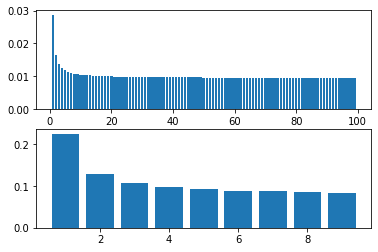

In [ ]:
import matplotlib.pyplot as plt
t = 0.9
longdata_rank = np.arange(1, 100)
shortdata_rank = np.arange(1, 10)
longdata_proba = softmax(1 / longdata_rank, t)
shortdata_proba = softmax(1 / shortdata_rank, t)


plt.subplot(211)
plt.bar(longdata_rank, longdata_proba)
plt.subplot(212)
plt.bar(shortdata_rank, shortdata_proba)

In [ ]:
def choose_next_config(df_results):
    """
    Interprète les résultats pour proposer 1 nouvelle configuration d'hyperparamètres à tester.
    Introduction d'une part aléatoire en choisissant un modèle inspiré de la génération précédente + bruit gaussien
    Args :
      - df_results : la DataFrame des résultats, avec une probabilité pour chaque modèle d'être sélectionné (proba_selection)
    Returns :
      - configuration : une configuration à tester pour les hyperparamètres : embedding_dim, hidden_dim, num_lstm_layers
    """
    # Retrouver les paramètres d'un modèle en fonction de proba sélection
    rand = random.random()
    idx = (df_results['proba_selection'].sort_values(ascending=False).cumsum()[(df_results['proba_selection'].sort_values(ascending=False).cumsum())>rand]).index[0]
    embedding_dim,	hidden_dim,	num_lstm_layers = df_results.loc[idx, ['embedding_dim',	'hidden_dim',	'num_lstm_layers']]
    # Appliquer un bruit aux paramètres
    bruit_dim = 25
    bruit_layers = 0.5

    embedding_dim_gauss = round(random.gauss(embedding_dim, bruit_dim))
    hidden_dim_gauss = round(random.gauss(hidden_dim, bruit_dim))
    num_lstm_layers_gauss = round(random.gauss(num_lstm_layers, bruit_layers))

    # Corriger les bords (nombre de dimensions > 100)
    if embedding_dim_gauss < 100:
        embedding_dim_gauss = 100
    if hidden_dim_gauss < 100:
        hidden_dim_gauss = 100
    if num_lstm_layers_gauss < 1:
        num_lstm_layers_gauss = 1
    
    configuration = (embedding_dim_gauss,	hidden_dim_gauss,	num_lstm_layers_gauss)

    return configuration, rand

In [ ]:
def find_next_configs(df_results, n = 1):
    """
    Interprète les résultats pour proposer de nouvelles configurations d'hyperparamètres à tester.
    Introduction d'une part aléatoire en choisissant un modèle inspiré de la génération précédente + bruit gaussien
    Args :
      - df_results : la DataFrame des résultats, avec une probabilité pour chaque modèle d'être sélectionné
      - n : le nombre de nouvelles configurations à tester
    Returns :
      - configurationsHP : liste de n configurations à tester pour les hyperparamètres : embedding_dim, hidden_dim, num_lstm_layers
    """
    configurationsHP = []
    for i in range(n):
        config, random_number = choose_next_config(df_results)
        configurationsHP.append(config)
    return configurationsHP

In [ ]:
def get_best_model(df_results):
    best_dev_loss_BM, embedding_dim_BM,	hidden_dim_BM,	num_lstm_layers_BM = (df_results[df_results["score"] == df_results["score"].max()])[['best_dev_loss', 'embedding_dim',	'hidden_dim',	'num_lstm_layers']].iloc[0]
    return best_dev_loss_BM, embedding_dim_BM,	hidden_dim_BM,	num_lstm_layers_BM

In [ ]:
# Iteration
def add_generation(results, n = 1, temperature = 1):
    """
    Ajoute n nouveaux modèles au test
    Args :
      - results : le dictionnaire des résultats
      - n : le nombre de nouvelles configurations à tester
    Returns :
      - results : le dictionnaire des résultats, avec n configurations en plus
    """
    df_results = create_df_res(results, temperature)
    configurationsHP = find_next_configs(df_results, n)
    results = search_HP(results, configurationsHP)
    saveResultsPickle(results)
    return results

**MAIN : Recherche des Hyperparamètres**

In [ ]:
# Récupérer les résultats des précédentes sessions
results = loadResultsPickle()

# Créer le dictionnaire results si results n'existe pas
try:
  results
except:
  results = {}

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Initialisation de la recherche par un gridsearch

# Gridsearch
l_embedding_dim = [100, 175] ## TO CHOOSE
l_hidden_dim = [125, 275] ## TO CHOOSE
l_num_lstm_layers = [2] ## TO CHOOSE

configurationsHP = list(product(l_embedding_dim, l_hidden_dim, l_num_lstm_layers))

results = search_HP(results, configurationsHP)

saveResultsPickle(results)

Mounted at /content/drive/


In [ ]:
# Recherche par générations
ngen = 2
n_child = 2

for i in range (ngen):
  print('\n\n\n\n')
  print("Génération : " , i+1)
  print('\n\n\n\n')
  add_generation(results, n = n_child, temperature = 1)
  df_results = create_df_res(results, temperature = 1)
  display(df_results)
  print(get_best_model(df_results))


df_results = create_df_res(results, temperature = 1)
display(df_results)
print("Meilleur modèle : " , get_best_model(df_results))
display(df_results[df_results["model_rank"] == 1])
print("Meilleure loss atteinte : " , df_results[df_results["best_dev_loss"] == df_results["best_dev_loss"].min()]["best_dev_loss"])
display(df_results[df_results["best_dev_loss"] == df_results["best_dev_loss"].min()])






Génération :  1





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 137 hidden_dim : 288 num_lstm_layers : 3 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.3633, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.16060945063412552
Epoch 1 : Validation loss = 0.354807244365414; Validation r = 0.2587510609805503
Epoch 2:
Total epoch loss = tensor(0.2662, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.20028273545851458
Epoch 2 : Validation loss = 0.29351783307890095; Validation r = 0.18535853056917392
Epoch 3:
Total epoch loss = tensor(0.2401, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.28218683013374946
Epoch 3 : Validation loss = 0.30120922476053236; Validation r = 0.20731018598362988
Epoch 4:
Total epoch loss = tensor(0.2145, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39420359152662837
Epoch 4 : Validation loss = 0.28181694969534876; Validation r = 0.30618264343796964
Epo

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.272675,0.240454,0.233096,0.226795,0.231401,4,0.226795,3,False,100,125,2,0.118166,0.030599,0.027033,-0.020306,0.226795,0.004605,4.321510,25.0,0.010279
1,0.296043,0.231261,0.225363,0.218778,0.213269,4,0.213269,4,True,100,275,2,0.218828,0.025504,0.029219,0.025181,0.213269,-0.005370,4.810042,6.0,0.042829
2,0.264085,0.241350,0.232761,0.230777,0.224135,4,0.224135,4,True,175,125,2,0.086091,0.035588,0.008520,0.028782,0.224135,-0.006451,4.593812,15.0,0.017132
3,0.376323,0.240542,0.233303,0.222468,0.227067,4,0.222468,3,False,175,275,2,0.360811,0.030095,0.046440,-0.020674,0.222468,0.004599,4.403980,21.0,0.012237
4,0.264448,0.223472,0.216265,0.225332,0.220949,4,0.216265,2,False,202,146,2,0.154950,0.032251,-0.041925,0.019449,0.216265,-0.004206,4.715672,11.0,0.023361
5,0.285592,0.284695,0.255049,0.253596,0.232842,4,0.232842,4,True,167,148,1,0.003142,0.104133,0.005697,0.081837,0.232842,-0.019055,4.677558,13.0,0.019767
6,0.247608,0.232511,0.228327,0.217413,0.214544,4,0.214544,4,True,100,266,2,0.060968,0.017997,0.047799,0.013194,0.214544,-0.002831,4.723364,10.0,0.025697
7,0.248694,0.236571,0.225225,0.221798,0.222341,4,0.221798,3,False,166,262,2,0.048746,0.047963,0.015216,-0.002448,0.221798,0.000543,4.497603,19.0,0.013525
8,0.293147,0.257258,0.222540,0.239475,0.223977,4,0.222540,2,False,154,152,3,0.122427,0.134954,-0.076098,0.064716,0.222540,-0.014402,4.804502,7.0,0.036710
9,0.270250,0.236156,0.223573,0.206472,0.209398,4,0.206472,3,False,122,307,1,0.126157,0.053285,0.076488,-0.014173,0.206472,0.002926,4.775587,8.0,0.032122


(0.20637889156738917, 162.0, 115.0, 1.0)





Génération :  2





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 117 hidden_dim : 100 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2976, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.33762169635455
Epoch 1 : Validation loss = 0.24796981724599998; Validation r = 0.5021709257866078
Epoch 2:
Total epoch loss = tensor(0.1672, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6258782533608443
Epoch 2 : Validation loss = 0.2292372605452935; Validation r = 0.5155370551900986
Epoch 3:
Total epoch loss = tensor(0.1031, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7747262938299544
Epoch 3 : Validation loss = 0.22611113066474597; Validation r = 0.5088879549063576
Epoch 4:
Total epoch loss = tensor(0.0684, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8553549719486004
Epoch 4 : Validation loss = 0.21771071199327707; Vali

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.272675,0.240454,0.233096,0.226795,0.231401,4,0.226795,3,False,100,125,2,0.118166,0.030599,0.027033,-0.020306,0.226795,0.004605,4.321510,33.0,0.007212
1,0.296043,0.231261,0.225363,0.218778,0.213269,4,0.213269,4,True,100,275,2,0.218828,0.025504,0.029219,0.025181,0.213269,-0.005370,4.810042,9.0,0.026445
2,0.264085,0.241350,0.232761,0.230777,0.224135,4,0.224135,4,True,175,125,2,0.086091,0.035588,0.008520,0.028782,0.224135,-0.006451,4.593812,19.0,0.012527
3,0.376323,0.240542,0.233303,0.222468,0.227067,4,0.222468,3,False,175,275,2,0.360811,0.030095,0.046440,-0.020674,0.222468,0.004599,4.403980,29.0,0.008207
4,0.264448,0.223472,0.216265,0.225332,0.220949,4,0.216265,2,False,202,146,2,0.154950,0.032251,-0.041925,0.019449,0.216265,-0.004206,4.715672,15.0,0.015867
5,0.285592,0.284695,0.255049,0.253596,0.232842,4,0.232842,4,True,167,148,1,0.003142,0.104133,0.005697,0.081837,0.232842,-0.019055,4.677558,17.0,0.014000
6,0.247608,0.232511,0.228327,0.217413,0.214544,4,0.214544,4,True,100,266,2,0.060968,0.017997,0.047799,0.013194,0.214544,-0.002831,4.723364,14.0,0.017000
7,0.248694,0.236571,0.225225,0.221798,0.222341,4,0.221798,3,False,166,262,2,0.048746,0.047963,0.015216,-0.002448,0.221798,0.000543,4.497603,26.0,0.009154
8,0.293147,0.257258,0.222540,0.239475,0.223977,4,0.222540,2,False,154,152,3,0.122427,0.134954,-0.076098,0.064716,0.222540,-0.014402,4.804502,10.0,0.023801
9,0.270250,0.236156,0.223573,0.206472,0.209398,4,0.206472,3,False,122,307,1,0.126157,0.053285,0.076488,-0.014173,0.206472,0.002926,4.775587,12.0,0.019834


(0.21158357746899129, 148.0, 100.0, 1.0)


### A bit of reflection

In the report, you can write:
- What configurations did you try and which one worked best?

More globally:
- Out of the three types of models you implemented, which one was the best?
- How do you think the/some models could be combined for better performance?

And a bit deeper:
- Have a look at the predictions of some of your models (1, 2 and/or 3). Do you observe anything interesting? Are the sentence pairs with the worst\* predictions more challenging, in your opinion? (e.g. they contain rare words)

\* "worst predictions" would be those which are farthest away from their corresponding gold value. You can determine this with the Mean Squared Error (MSE).

## Team-specific exercise



### Team A: Spanish STS

Your task will consist in addressing STS in Spanish. For this purpose you will download a specific dataset, as well as Spanish word embeddings. You will implement a model like that in (2) for this task. 
Additionally, you will combine the word embeddings with at least one feature of those used in (1) (yes, it could be simple word overlap).

#### (Team A) Dataset

- For training: the [**2015** data](http://ixa2.si.ehu.es/stswiki/images/9/9d/STS2015-es-test.zip) (751 instances)
- For testing: the [**2017 track 3** data](http://ixa2.si.ehu.es/stswiki/images/2/20/Sts2017.eval.v1.1.zip) with its [gold standard](http://ixa2.si.ehu.es/stswiki/images/7/70/Sts2017.gs.zip) (250 instances)


Download the datasets, upload them to Colab, get acquainted with them, and load them using the code below.

In [ ]:
# Loading team A datasets
! unzip STS2015-es-test.zip -d STS2015-es-test
! unzip Sts2017.eval.v1.1.zip
! unzip Sts2017.gs.zip

In [ ]:
def load_mono_spanish_data():
  traindir = "STS2015-es-test/"  
  data = dict()
  for subset in ["train","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = []  
  train_data_by_category = dict()
  train_scores_by_category = dict()  
  for fn in os.listdir(traindir):
    _, typ, category, _ = fn.split(".")
    with open(traindir + fn) as f:      
      if typ == "gs":
        train_scores_by_category[category] = []
        for l in f:
          train_scores_by_category[category].append(float(l))
      elif typ == "input":
        train_data_by_category[category] = []
        for l in f:
          train_data_by_category[category].append(l.strip().split("\t"))

  for cat in train_data_by_category:
    data['train']['data'].extend(train_data_by_category[cat])
    data['train']['scores'].extend(train_scores_by_category[cat])

  #### now test data and then we merge them...  
  with open("STS2017.eval.v1.1/STS.input.track3.es-es.txt") as f:
    for l in f:
      data['test']['data'].append(l.strip().split("\t"))
  with open("STS2017.gs/STS.gs.track3.es-es.txt") as f:
    for l in f:
      data['test']['scores'].append(float(l))
 
  return data



In [ ]:
# Load the data

mono_data = load_mono_spanish_data()

print("Score ranges:")
print(min(mono_data['train']['scores']), "-", max(mono_data['train']['scores']))
print(min(mono_data['test']['scores']), "-", max(mono_data['test']['scores']))

## Careful! The range of scores is different in the Spanish training set. It goes from 0 to 4.
# We will map it to a 0-5 scale

mono_data['train']['scores'] = (np.array(mono_data['train']['scores']) / 4) * 5

## Also, you may notice that some sentence pairs are repeated within the training set, but have different scores.
## We will simply make sure that there is no overlap between the training and the test datasets:


found = False
tr_sps = [tuple(ins) for ins in mono_data['train']['data']]
te_sps = [tuple(ins) for ins in mono_data['test']['data']]
for ins in te_sps:
  if ins in tr_sps:
    found = True
    break
if found:
  print("Found some repetition")
else:
  print("No repetitions found")


#### (Team A) Word embeddings in other languages

In this experiment, you will implement a model using word embeddings, similar to what you did in (2). This time you will combine word-embedding-based features with some other feature from the model in (1).

For STS in Spanish, we will download Spanish Fasttext word embeddings from [this website](https://fasttext.cc/docs/en/crawl-vectors.html). The link to the Spanish embeddings is [here](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz).
You can either download them from the link or using the code below.

For convenience, for these word embeddings we will use a different library: `fasttext`. The code below shows how to retrieve the embedding for a word.


In [ ]:
# This will take a while

! pip install fasttext
import fasttext.util
print("Installed and loaded the library")
# Download Spanish embeddings using this code or from the link above
fasttext.util.download_model('es', if_exists='ignore')
print("Downloaded embeddings")
# Load them
ft = fasttext.load_model('cc.es.300.bin')
print("Loaded embeddings")

# This is how you get the embedding of a word
vector = ft.get_word_vector('hola')

#### Spanish specifics

Be careful: not all features may readily work for Spanish (for example, WordNet is English). Ideally, you should use a tokenizer that is specific for Spanish. You can find some sample code below.

In [ ]:
! pip install spacy
# Downloading Spanish model
! python -m spacy download es_core_news_sm
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()
#nlp = spacy.load('es_core_news_sm')
text = "Esto es una frase en español."
processed_text = nlp(text)
for t in processed_text:
  print(t)

In [ ]:
def assign_FT_vectors(data, vectors, sim_or_dist=True, lowercase=False):
  # Build a function similar to assign_distributional_embeddings which works with 
  # this embedding format. Additionally, this function calculates other features from the model
  # you used in (1) - you can reuse code from your <extract_features> function. 
  ## TO COMPLETE
 
  return features

In [ ]:
# Obtain train_x, test_x and train_y, test_y
## TO COMPLETE

In [ ]:
## Extract features, run classifier, evaluate.
## TO COMPLETE


### Team B: Cross-lingual English-Spanish STS

Your task will consist in addressing cross-lingual STS, where $s_1$ and $s_2$ are in different languages. For this purpose you will download a specific dataset. 

#### (Team B) Dataset

- For training: the **2016** [trial](http://ixa2.si.ehu.es/stswiki/images/f/f4/Sts2016-crosslingual-trial.zip) and [test data](http://ixa2.si.ehu.es/stswiki/images/f/fb/Sts2016-cross-lingual-test.tar.gz) (698 instances)
- For testing: the **2017 track 4a and 4b** data (500 instances, link just above, including data for Machine Translation evaluation). It can be downloaded [here](http://ixa2.si.ehu.es/stswiki/images/2/20/Sts2017.eval.v1.1.zip) and [here](http://ixa2.si.ehu.es/stswiki/images/7/70/Sts2017.gs.zip).

Download the datasets, upload them to Colab, get acquainted with them, and load them using the code below.



In [ ]:
# Team B datasets
! unzip Sts2017.eval.v1.1.zip
! unzip Sts2017.gs.zip
! tar -xvzf Sts2016-cross-lingual-test.tar.gz
! unzip Sts2016-crosslingual-trial.zip


In [ ]:
def load_crosslingual_data():  
  data = dict()
  for subset in ["train","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = [] 

  for input_file in ["STS2016-Crosslingual-Trial/STS.input.crosslingual-trial.txt", "STS2016-cross-lingual-test/STS.input.news.txt", "STS2016-cross-lingual-test/STS.input.multisource.txt"]:
      with open(input_file) as f:
        for l in f:
          data['train']['data'].append(l.strip().split("\t")[:2])
  for gs_file in ["STS2016-Crosslingual-Trial/STS.gs.crosslingual-trial.txt", "STS2016-cross-lingual-test/STS.gs.news.txt", "STS2016-cross-lingual-test/STS.gs.multisource.txt"]:
    with open(gs_file) as f:
      for l in f:
        data['train']['scores'].append(float(l))
  
  # now test data...
  for input_file in ["STS2017.eval.v1.1/STS.input.track4a.es-en.txt", "STS2017.eval.v1.1/STS.input.track4b.es-en.txt"]:
      with open(input_file) as f:
        for l in f:
          data['test']['data'].append(l.strip().split("\t")[:2])
  for gs_file in ["STS2017.gs/STS.gs.track4a.es-en.txt", "STS2017.gs/STS.gs.track4b.es-en.txt"]:
    with open(gs_file) as f:
      for l in f:
        data['test']['scores'].append(float(l))
  return data

In [ ]:
cl_data = load_crosslingual_data()

print("Score ranges:")
print(min(cl_data['train']['scores']), "-", max(cl_data['train']['scores']))
print(min(cl_data['test']['scores']),"-", max(cl_data['test']['scores']))

## Take note: what sentence comes first, the one in Spanish or the one in English?
for i in range(3):
  print(cl_data["train"]["data"][i])
  print(cl_data["test"]["data"][i])

## Also, you may notice that some sentence pairs are repeated within the training set, but have different scores.
## We will simply make sure that there is no overlap between the training and the test datasets:

found = False
tr_sps = [tuple(ins) for ins in cl_data['train']['data']]
te_sps = [tuple(ins) for ins in cl_data['test']['data']]
for ins in te_sps:
  if ins in tr_sps:
    found = True
    break
if found:
  print("Found some repetition")
else:
  print("No repetitions found")


#### (Team B) Translate before training

One common way of solving cross-lingual STS actually involves automatically translating sentences from one of the languages to the other and treating it as a monolingual task.

Try translating sentences in **at least two different ways** (Spanish -> English, English -> Spanish, using different Machine Translation systems...). You can use the online interfaces of well-known MT systems.

Load the translated sentences (you may need to write additional functions to load the data) and train and evaluate any of the models you implemented above on this dataset.


#### Spanish specifics

Be careful: if you choose to translate English to Spanish, some features may not work (e.g. Wordnet-based features). You should also use a tokenizer that is specific for this language. You can find some sample code below.

In [ ]:
! pip install spacy
# Downloading Spanish model
! python -m spacy download es_core_news_sm
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()
#nlp = spacy.load('es_core_news_sm')
text = "Esto es una frase en español."
processed_text = nlp(text)
for t in processed_text:
  print(t)

Esto
es
una
frase
en
español
.


In [ ]:
### Use any of the models implemented in 1-2-3. Prepare it /modify it if necessary
## Maybe: TO COMPLETE

In [ ]:
# Obtain train_x, test_x and train_y, test_y
## TO COMPLETE

Done train x


In [ ]:
## Extract features, run classifier, evaluate.
## TO COMPLETE


## A bit of reflection

Regardless of the team you have been in, you can reflect upon the following questions for the report:
- Was this task harder than the one you tackled in 1-2-3 (i.e., were results worse or better?)? Why do you think this is the case?
- Out of the different things you tried, what worked best? Did it meet your expectations?